In [1]:
# Importing Python modules that will be used in this project

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [2]:
# Loading the .csv file

life_gdp = pd.read_csv('all_data.csv')
life_gdp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# Renaming the column 'Life expectancy at birth (years)'

life_gdp = life_gdp.rename({'Life expectancy at birth (years)' : 'Life_Expectancy'}, axis=1)

In [4]:
# Exploring the data

life_gdp.info()

print(life_gdp.Country.unique())

print(life_gdp.Year.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


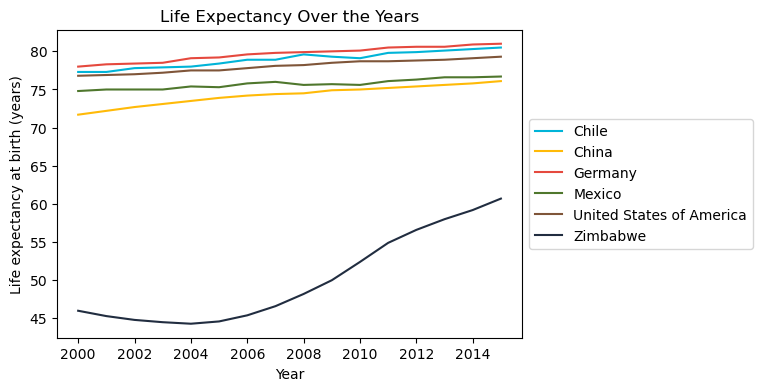

<Figure size 640x480 with 0 Axes>

In [5]:
# Creating a palette for the graphs

palette_color = ['#00b4d8', '#ffba08', '#e5493e', '#4f772d', '#7f5539', '#212d40']

# Creating the graph of Life_Expectancy versus Year for all countries

plt.figure(figsize=(6,4))
sns.lineplot(data=life_gdp, x='Year', y='Life_Expectancy', hue='Country', palette=palette_color)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.title('Life Expectancy Over the Years')
plt.ylabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

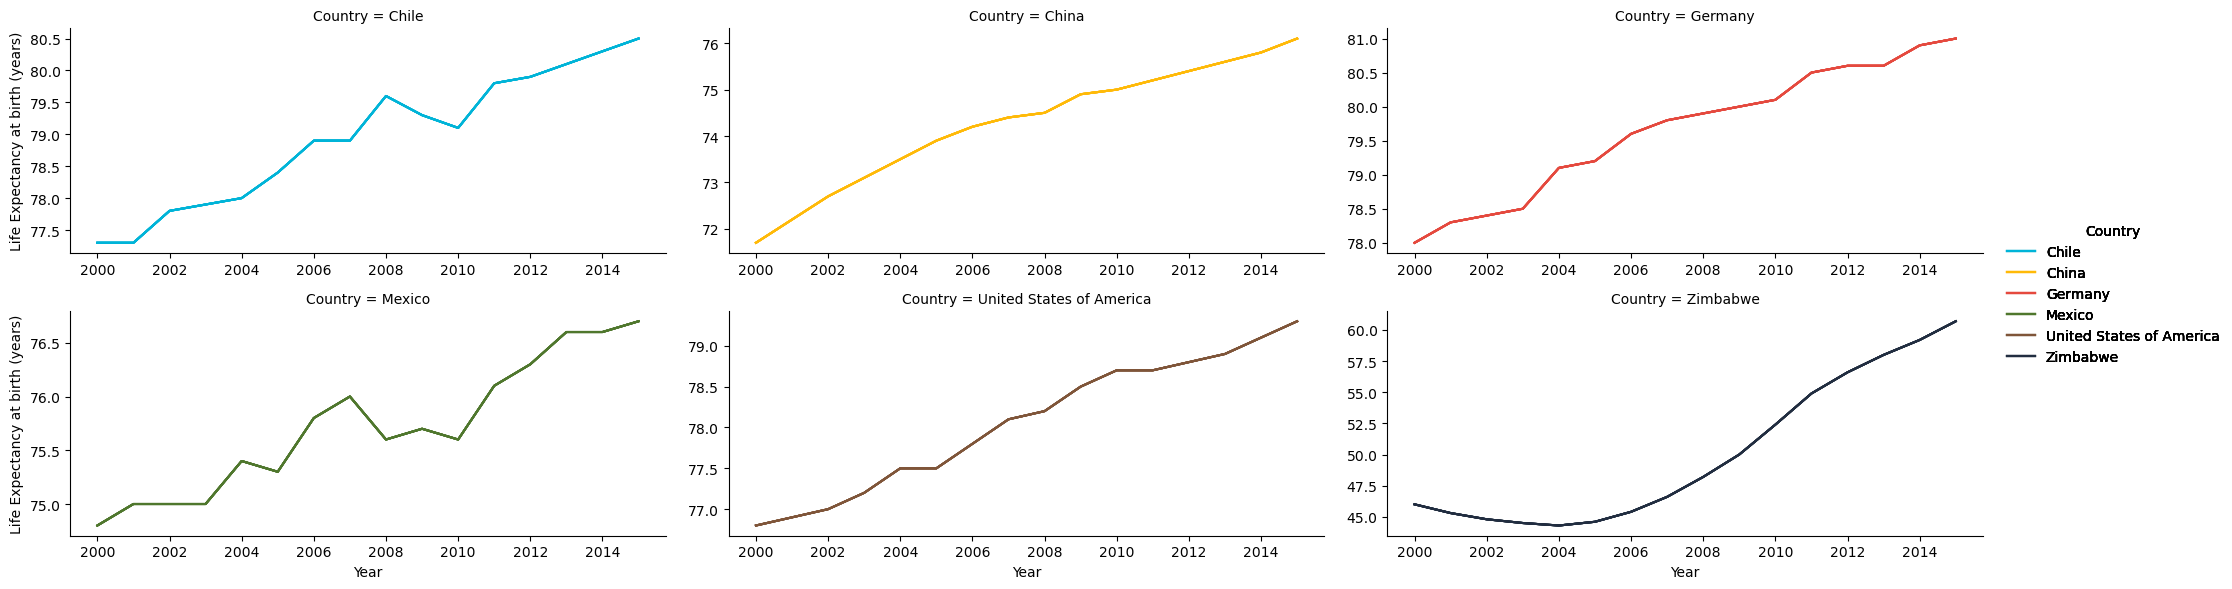

In [20]:
# Creating a line chart of Life Expectancy versus Year for each country

country = list(life_gdp.Country.unique())

graph = sns.FacetGrid(life_gdp, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False, palette=palette_color)

for country in country:
    graph.map(plt.plot,"Year", "Life_Expectancy")
    graph.add_legend()
    graph.set_axis_labels("Year", "Life Expectancy at birth (years)")
    

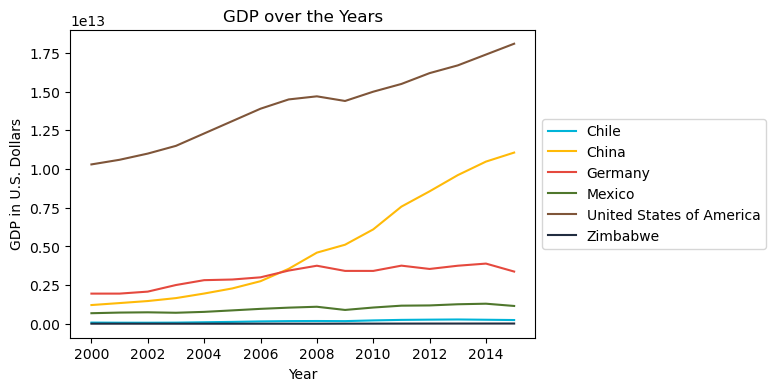

<Figure size 640x480 with 0 Axes>

In [7]:
# Creating a line chart of GDP versus Year for all countries

plt.figure(figsize=(6,4))
sns.lineplot(data=life_gdp, x='Year', y='GDP', hue='Country', palette=palette_color)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
plt.title('GDP over the Years')
plt.ylabel('GDP in U.S. Dollars')
plt.show()
plt.clf()

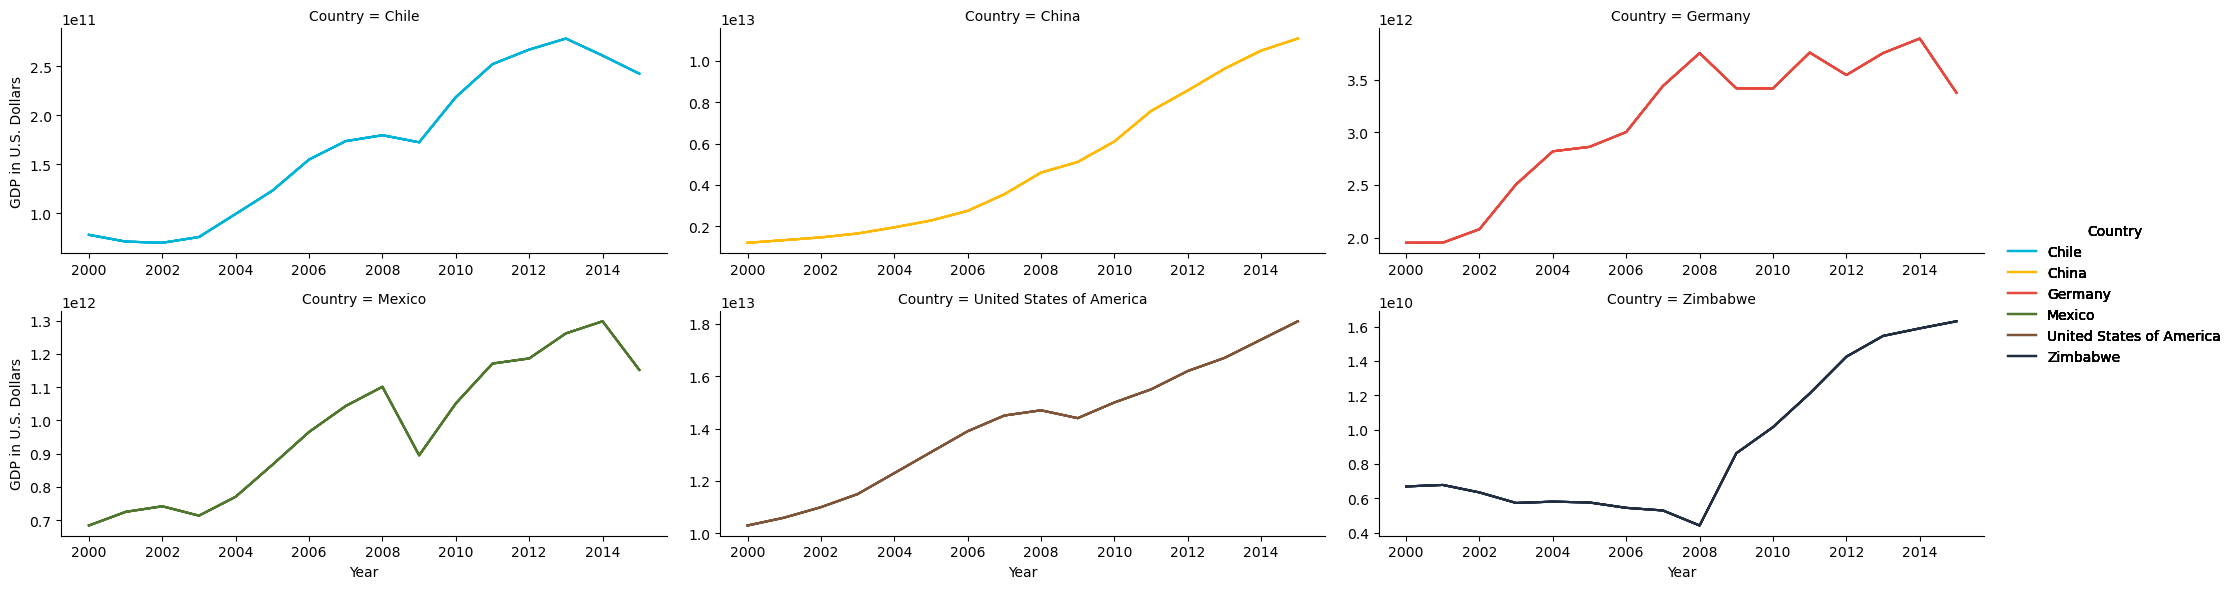

In [21]:
# Creating a line chart of GDP versus Year for each country

country = list(life_gdp.Country.unique())

graph = sns.FacetGrid(life_gdp, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False, palette=palette_color)

for country in country:
    graph.map(plt.plot,"Year", "GDP")
    graph.add_legend()
    graph.set_axis_labels("Year", "GDP in U.S. Dollars")

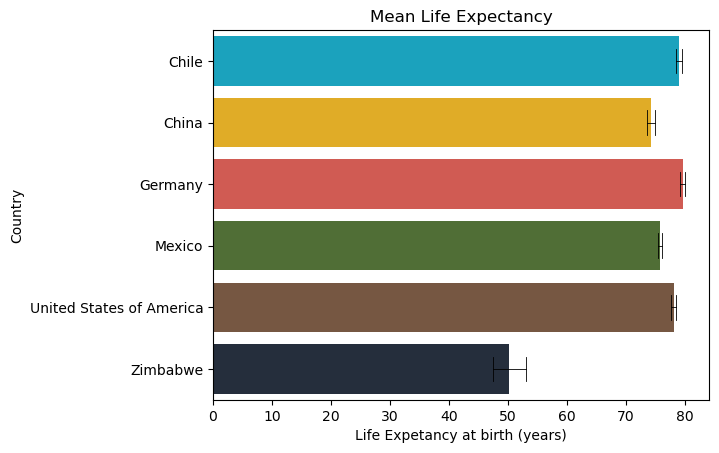

In [9]:
# Analyzing mean life expectancy for each country

sns.barplot(data=life_gdp, x='Life_Expectancy', y='Country', palette=palette_color, capsize=0.4, errcolor='black', errwidth=0.6)
plt.title('Mean Life Expectancy')
plt.xlabel('Life Expetancy at birth (years)')
plt.show()

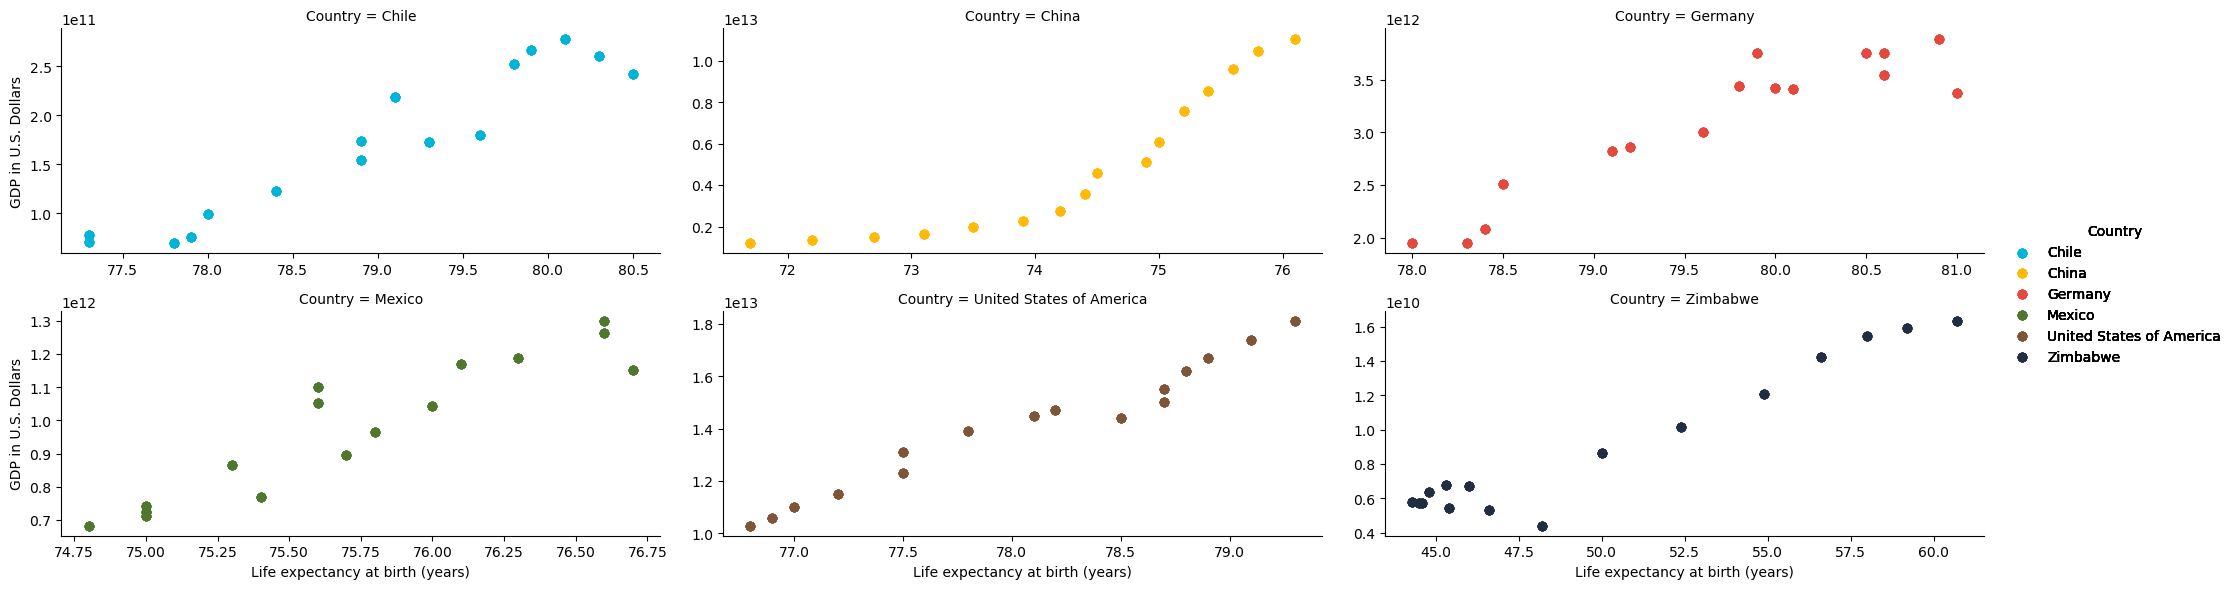

In [10]:
# Exploring relationship between Life_Expectancy and GDP per country

country = list(life_gdp.Country.unique())

graph = sns.FacetGrid(life_gdp, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False, palette=palette_color)

for country in country:
    graph.map(plt.scatter,"Life_Expectancy", "GDP")
    graph.add_legend()
    graph.set_axis_labels("Life expectancy at birth (years)", "GDP in U.S. Dollars")

In [11]:
# Calculating the Pearson correlation coefficient for each country

country = list(life_gdp.Country.unique())
for country in country:
    corr_lifeexpectancy_gdp, p = pearsonr(life_gdp[life_gdp['Country'] == country].Life_Expectancy, life_gdp[life_gdp['Country'] == country].GDP)
    print('The correlation for ' + country + ' is: ' + str(corr_lifeexpectancy_gdp))

The correlation for Chile is: 0.9498766659254416
The correlation for China is: 0.9085255408648358
The correlation for Germany is: 0.932698898256127
The correlation for Mexico is: 0.9322377167847082
The correlation for United States of America is: 0.9817092382430257
The correlation for Zimbabwe is: 0.9661998955858777


Intercept         -4.776788e+13
Life_Expectancy    6.385269e+11
dtype: float64


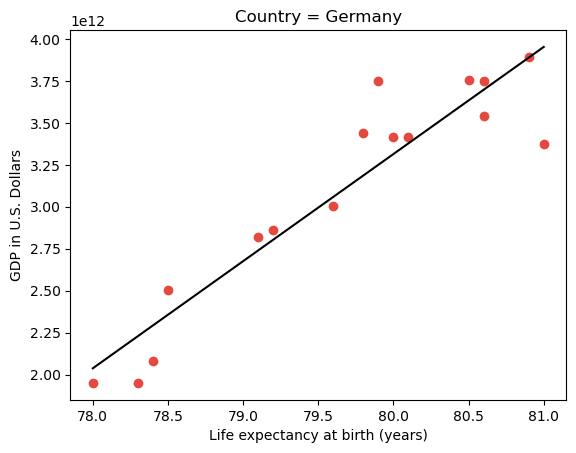

Intercept         -2.284545e+13
Life_Expectancy    3.146130e+11
dtype: float64


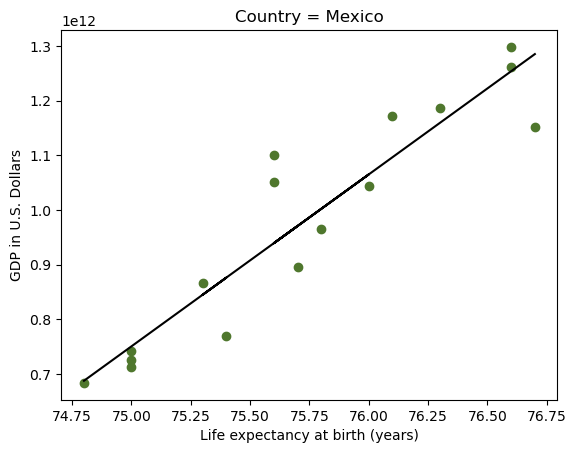

Intercept         -2.098456e+14
Life_Expectancy    2.868478e+12
dtype: float64


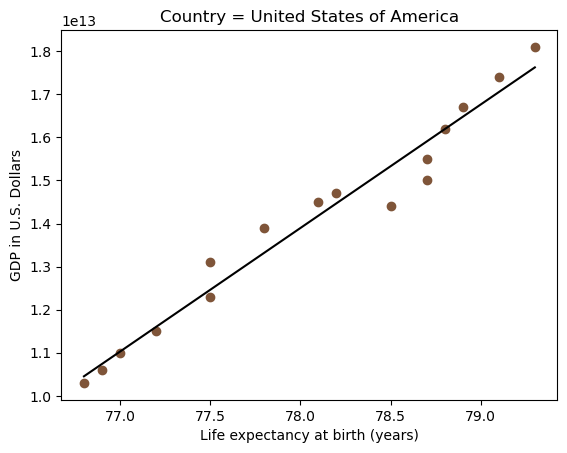

Intercept         -2.595927e+10
Life_Expectancy    6.991261e+08
dtype: float64


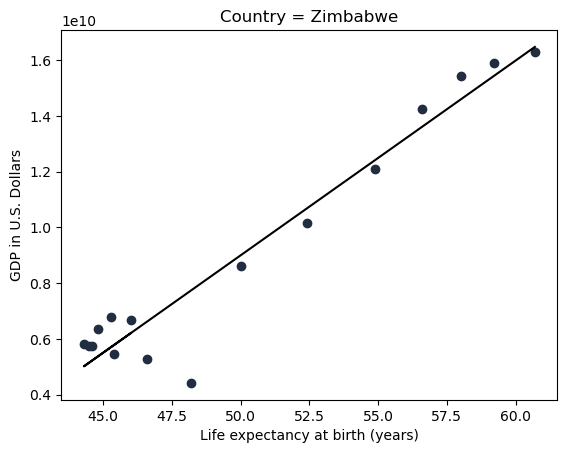

<Figure size 640x480 with 0 Axes>

In [12]:
# Fitting a linear regression to predict Life Expectancy based on GDP for Germany, Mexico, USA and Zimbabwe

country_linear_regress = ['Germany', 'Mexico', 'United States of America', 'Zimbabwe']
palette_color_linear = ['#e5493e', '#4f772d', '#7f5539', '#212d40']
i=0
for country in country_linear_regress:
    model = sm.OLS.from_formula("GDP ~ Life_Expectancy", life_gdp[life_gdp['Country'] == country])
    results = model.fit()
    print(results.params)

    plt.scatter(life_gdp[life_gdp['Country'] == country].Life_Expectancy, life_gdp[life_gdp['Country'] == country].GDP, color=palette_color_linear[i])
    plt.plot(life_gdp[life_gdp['Country'] == country].Life_Expectancy, results.params[0] + results.params[1]*life_gdp[life_gdp['Country'] == country].Life_Expectancy, color='black')
    plt.title('Country = ' + country)
    plt.ylabel('GDP in U.S. Dollars')
    plt.xlabel('Life expectancy at birth (years)')
    plt.show()
    plt.clf()
    
    i+=1

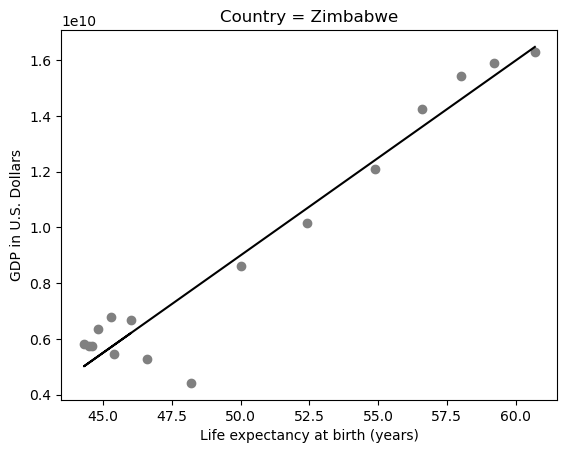

A GDP of $31369071486.63 dollars is needed to reach a life expectancy of 82 years.
None


<Figure size 640x480 with 0 Axes>

In [13]:
# Creating a function that take two parameters (country and GDP) to predict GDP based on Life_Expectancy

def linear_regression(country, life_expectancy):
    if country in country_linear_regress:
        model = sm.OLS.from_formula("GDP ~ Life_Expectancy", life_gdp[life_gdp['Country'] == country])
        results = model.fit()

        plt.scatter(life_gdp[life_gdp['Country'] == country].Life_Expectancy, life_gdp[life_gdp['Country'] == country].GDP, color='gray')
        plt.plot(life_gdp[life_gdp['Country'] == country].Life_Expectancy, results.params[0] + results.params[1]*life_gdp[life_gdp['Country'] == country].Life_Expectancy, color='black')
        plt.title('Country = ' + country)
        plt.ylabel('GDP in U.S. Dollars')
        plt.xlabel('Life expectancy at birth (years)')
        plt.show()
        plt.clf()
        x=life_expectancy
        y=results.params[0] + results.params[1]*x

        print('A GDP of $' + str(round(y, 2)) + ' dollars is needed to reach a life expectancy of ' + str(life_expectancy) + ' years.')
 
        
print(linear_regression('Zimbabwe', 82))        